In [1]:
import pandas as pd
import numpy as np 
import json
import csv


import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm_notebook as tqdm

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer 
import nltk
nltk.download('averaged_perceptron_tagger')

import spacy
import math

import string
import sys
import random

from collections import Counter
from itertools import chain

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/aarunku5/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
df_wino = pd.read_csv('./test_good_101_1.csv')
nlp = spacy.load("en_trf_bertbaseuncased_lg")
words=pd.DataFrame()
frames=[df_wino['sentence1'],df_wino['sentence2']]
words['full'] = pd.concat(frames)
words.reset_index(inplace = True) 
words['casewords'] = words['full'].str.lower()
words['wsw'] = words['casewords'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
words['nopunc'] = words['wsw'].str.replace("'", "")
words['nopunc'] = words['nopunc'].str.replace(".", "")
words['nopunc'] = words['nopunc'].str.replace(",", "")
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]
words['text_lemmatized'] = words.nopunc.apply(lemmatize_text)
words['final']="NaN"
def final(x):
    makeitastring = ' '.join(map(str, x))
    makeitastring=makeitastring.replace(",","")
    makeitastring=makeitastring.replace("'","")
    makeitastring=makeitastring.replace("[","")
    makeitastring=makeitastring.replace("]","")
    return makeitastring
for i in tqdm(range(len(words))):    
    column=['text_lemmatized']
    row=[i]
    words.loc[i,'final']=final(words.loc[i,'text_lemmatized'])
words['fullnopunc'] = words['full'].str.replace("'", "")
words['fullnopunc'] = words['fullnopunc'].str.replace(".", "")
words['fullnopunc'] = words['fullnopunc'].str.replace(",", "")
words['label']='NaN'
for i in tqdm(range(len(df_wino))):
    words.loc[i,'label']=df_wino.loc[i,'gold_label']
    words.loc[(i+len(df_wino)),'label']=df_wino.loc[i,'gold_label']
words.to_csv('./test_good_101_1_words.csv', index = False)
e=pd.DataFrame(columns=['label','final','fullnopunc'])
n=pd.DataFrame(columns=['label','final','fullnopunc'])
c=pd.DataFrame(columns=['label','final','fullnopunc'])
#split test labels
for i in tqdm(range(len(words))):
    l=words.loc[i,'label']
    new_row={'label':words.loc[i,'label'],'final':words.loc[i,'final'],'fullnopunc':words.loc[i,'fullnopunc']}
    if(l=='entailment'):
        e=e.append(new_row, ignore_index=True)
    elif(l=='neutral'):
        n=n.append(new_row, ignore_index=True)
    else:
        c=c.append(new_row,ignore_index=True)
e.to_csv('./test_good_101_1_wordse.csv', index = False)
n.to_csv('./test_good_101_1_wordsn.csv', index = False)
c.to_csv('./test_good_101_1_wordsc.csv', index = False)











In [3]:
print(len(e))
print(len(n))
print(len(c))
print(len(df_wino))
print(len(words))

48
104
50
101
202


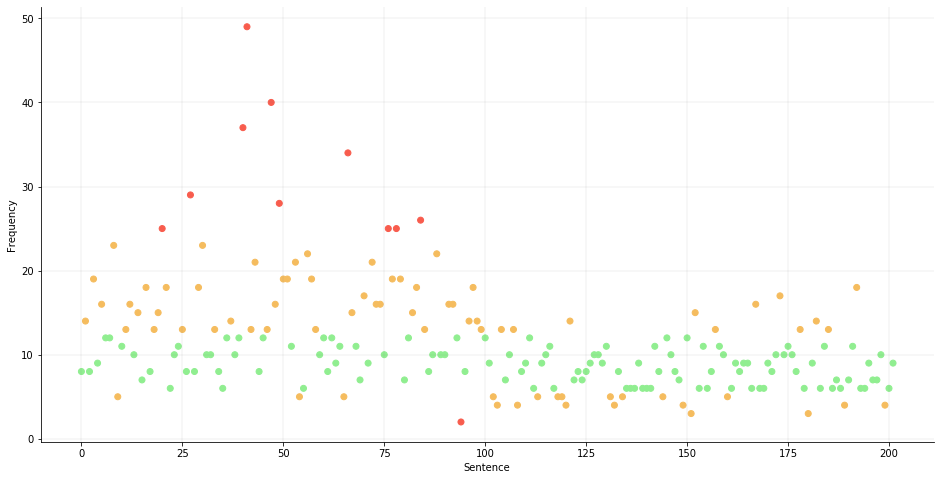

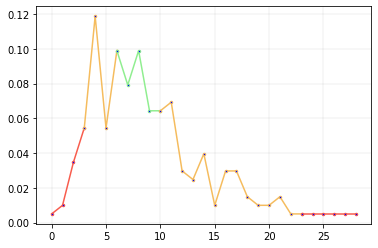

5.792079207920792
6.634669655407301
202
188
0.9306930693069307
11.96692027334937


In [4]:
magwords=words.final.str.split(expand=True).stack().value_counts()
t1g=magwords.size/len(df_wino)
#--------------------------------------------------------------------
g=[]
for i in range(len(words)):
    x=words.iloc[i]['fullnopunc']
    g.append(len(x.split()))
gstd=pd.Series(g).std()
#--------------------------------------------------------------------
z=[]
for i in range(len(pd.Series(g))):
    if(g[i]<3 or g[i]>23):
        z.append(0)
    elif(g[i]>5 and g[i]<13):
        z.append(2)
    else:
        z.append(1)
def col(z):
    arr=[]
    for i in range(len(z)):
        if(z[i]==0):
            arr.append('#f85c4d')
        elif(z[i]==1):
            arr.append('#f5bc5e')
        else:
            arr.append('#90ee90')
    return arr
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(range(len(g)),pd.Series(g),c=col(z))
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('Sentence')
ax.set_ylabel('Frequency')
plt.show()
plt.clf()
gcount=Counter(g)
gcount=pd.Series(gcount).sort_index()
gcount=gcount/len(g)
a=len(gcount)
x = np.linspace(0,a-1, num=a)
y = gcount
x0 = 3
x1 = 6
x2 = 10
x3 = 23
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.plot(x[:x0+1], y[:x0+1],marker='.', markerfacecolor='blue', markersize=5,color="#f85c4d")
plt.plot(x[x0:x1+1], y[x0:x1+1],marker='.', markerfacecolor='blue', markersize=5,color="#f5bc5e")
plt.plot(x[x1:x2+1], y[x1:x2+1],marker='.', markerfacecolor='blue', markersize=5,color="#90ee90")
plt.plot(x[x2:x3+1], y[x2:x3+1],marker='.', markerfacecolor='blue', markersize=5,color="#f5bc5e")
plt.plot(x[x3:], y[x3:],marker='.', markerfacecolor='blue', markersize=5,color="#f85c4d")
plt.show()
#--------------------------------------------------------------------
nrg=len(words)
drg=0
for i in range(len(g)):
    xg=g[i]
    xg=(xg-3)*(30-xg)
    if(xg>0):
        drg=drg+1
    else:
        drg=drg-1
#--------------------------------------------------------------------
print(t1g)
print(gstd)
print(nrg)
print(drg)
t3g=drg/nrg
print(t3g)
dqic1g=t1g+(gstd*t3g)
print(dqic1g)

SENTENCE


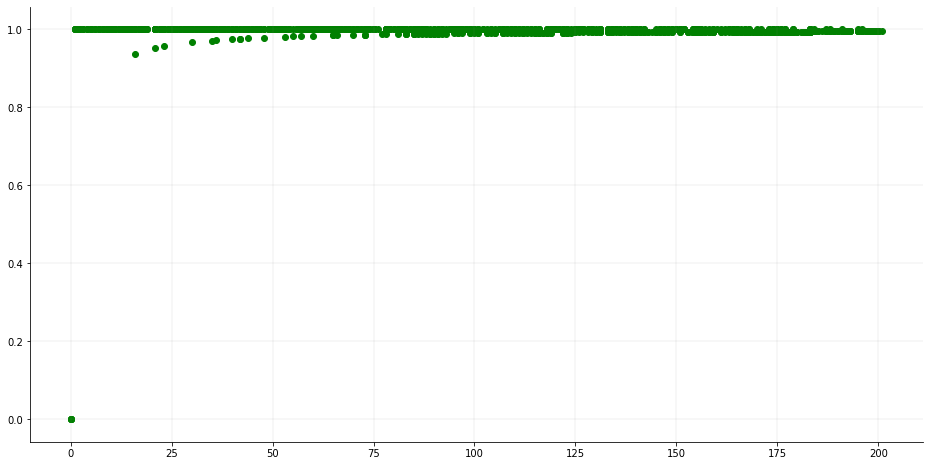

<Figure size 432x288 with 0 Axes>

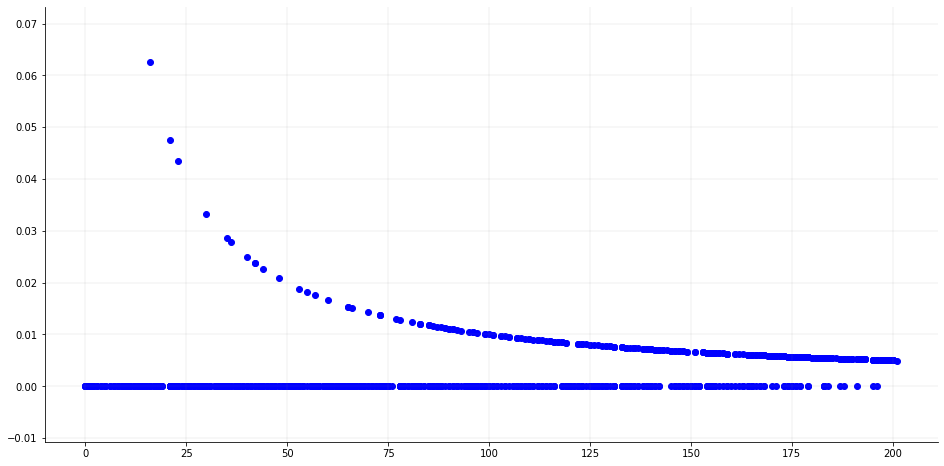

0.06317199051528868
0.0049868655553537665
0.003990700385663723
2.4868828067173827e-05
1    0.995025
2    0.004975
Name: sentence, dtype: float64
1/T1
0.0003509182168450743
T1
2849.666822630318
198
202
T2
0.9801980198019802
WORDS
585
5.326602721371306e-05
1/T1
0.00729835784363257
T1
137.01712377291105
824
1294
T2
0.6367851622874807
man        0.059505
woman      0.035549
people     0.016229
two        0.014683
sitting    0.012365
black      0.011592
dtype: float64
ADJ
1/T1
0.01796284421456917
T1
55.670471115533445
248.0
76.0
T2
0.3064516129032258
22     15.0
29     14.0
96     11.0
34     10.0
19      8.0
68      8.0
95      7.0
46      7.0
123     6.0
13      4.0
128     4.0
5       4.0
56      4.0
118     3.0
8       3.0
49      3.0
99      3.0
127     3.0
105     2.0
24      2.0
dtype: float64
130
ADV
1/T1
0.04591666465592105
T1
21.778585345724757
36.0
-4.0
T2
-0.1111111111111111
9     0.138889
20    0.111111
13    0.083333
2     0.055556
15    0.055556
7     0.055556
8     0.055556


<Figure size 432x288 with 0 Axes>

In [5]:
print("SENTENCE")
gwords=pd.read_csv("./test_good_101_1_words.csv")
df_traingood = pd.read_csv("./test_good_101_1.csv")
nlp = spacy.load("en_trf_bertbaseuncased_lg")
data = gwords['fullnopunc'].to_list()
dff = pd.DataFrame(data,columns=['sentence'])
dff = dff.dropna(thresh=1)
m1=[]
m2=[]
xx=[]

for i in range(1000):
    df=dff.sample(frac=random.random())
    count = df['sentence'].value_counts() 
    x=count.value_counts(normalize=True)
    x.sort_index()
    z=x.index
    y=[]
    for j in range(1,3):
        if j in z:
            y.append(x[j])
        else:
            y.append(0)       
    m1.append(y[0])
    m2.append(y[1])
    xx.append(len(count))    
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(xx,m1,c='green')
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()
plt.clf()
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(xx,m2,c='blue')
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()
plt.clf()

print(pd.Series(m1).std())
print(pd.Series(m2).std())
print(pd.Series(m1).var())
print(pd.Series(m2).var())

count = dff['sentence'].value_counts() 
count.sort_values(ascending=False)
print(count.value_counts(normalize=True))

sentencestd=(count/len(count)).std()

print("1/T1")
print(sentencestd)
print("T1")
print(1/sentencestd)

nr=len(gwords)
dr=0
for i in range(len(count)):
    xdr=(2-count[i])
    if(xdr>0):
        dr=dr+count[i]
    else:
        dr=dr-count[i]
print(dr)
print(nr)
print("T2")
print(dr/nr)
#------------------------------------------------------
print("WORDS")
magwordsg=gwords.final.str.split(expand=True).stack().value_counts()
gnw=(magwordsg/len(magwordsg))
print(len(magwordsg))
print(gnw.var())
print("1/T1")
print(gnw.std())
print("T1")
print(1/gnw.std())

nr=magwordsg.sum() 
dr=0
for i in range(len(magwordsg)):
    xdr=((0.01*nr)-magwordsg[i])*(magwordsg[i]-1)
    if(xdr>=0):
        dr=dr+magwordsg[i]
    else:
        dr=dr-magwordsg[i]
print(dr)
print(nr)
print("T2")
print(dr/nr)
print((magwordsg/nr).head(6))
#------------------------------------------------------
tagged=nltk.pos_tag(magwordsg.index)
tagged
tagged_reduced_adjective = set()
tagged_reduced_verbs = set()
tagged_reduced_adverbs = set()
tagged_reduced_nouns = set()
for speech_tag in tagged:
    if speech_tag[1] in ['JJ','JJR','JJS']:
        tagged_reduced_adjective.add(speech_tag[0])
    elif speech_tag[1] in ['RB','RBR','RBS']:
        tagged_reduced_adverbs.add(speech_tag[0])
    elif speech_tag[1] in ['VB','VBD','VBG','VBN','VBP','VBZ']:
        tagged_reduced_verbs.add(speech_tag[0])
    elif speech_tag[1] in ['NN','NNS','NNP','NNPS']:
        tagged_reduced_nouns.add(speech_tag[0])
print("ADJ")
arr=np.zeros(shape=(len(tagged_reduced_adjective)))
j=0
for w in (tagged_reduced_adjective):
    for i in range(len(magwordsg)):
        if(magwordsg.index[i]==w):
            arr[j]=magwordsg[i]
            j=j+1
narr=(arr/len(arr))
adjvar=narr.std()
print("1/T1")
print(adjvar)
print("T1")
print(1/adjvar)


nr=arr.sum() 
print(nr)
dr=0
for i in range(len(arr)):
    xdr=((0.02*nr)-arr[i])*(arr[i]-1)
    if(xdr>=0):
        dr=dr+arr[i]
    else:
        dr=dr-arr[i]
print(dr)
print("T2")
print(dr/nr)

print(pd.Series(arr).sort_values(ascending=False).head(20))
print(len(arr))
#------------------------------------------------------
print("ADV")
arr=np.zeros(shape=(len(tagged_reduced_adverbs)))
j=0
for w in (tagged_reduced_adverbs):
    for i in range(len(magwordsg)):
        if(magwordsg.index[i]==w):
            arr[j]=magwordsg[i]
            j=j+1
narr=(arr/len(arr))
advvar=narr.std()
print("1/T1")
print(advvar)
print("T1")
print(1/advvar)

nr=arr.sum() 
print(nr)
dr=0
for i in range(len(arr)):
    xdr=((0.03*nr)-arr[i])*(arr[i]-1)
    if(xdr>=0):
        dr=dr+arr[i]
    else:
        dr=dr-arr[i]
print(dr)
print("T2")
print(dr/nr)

print(pd.Series(arr/nr).sort_values(ascending=False).head(20))
#------------------------------------------------------
print("VERB")
arr=np.zeros(shape=(len(tagged_reduced_verbs)))
j=0
for w in (tagged_reduced_verbs):
    for i in range(len(magwordsg)):
        if(magwordsg.index[i]==w):
            arr[j]=magwordsg[i]
            j=j+1
narr=(arr/len(arr))
verbvar=narr.std()
print("1/T1")
print(verbvar)
print("T1")
print(1/verbvar)



nr=arr.sum() 
print(nr)
dr=0
for i in range(len(arr)):
    xdr=((0.01*nr)-arr[i])*(arr[i]-1)
    if(xdr>=0):
        dr=dr+arr[i]
    else:
        dr=dr-arr[i]
print(dr)
print("T2")
print(dr/nr)
print(pd.Series(arr/nr).sort_values(ascending=False).head(20))
#------------------------------------------------------
print("NOUN")
arr=np.zeros(shape=(len(tagged_reduced_nouns)))
j=0
for w in (tagged_reduced_nouns):
    for i in range(len(magwordsg)):
        if(magwordsg.index[i]==w):
            arr[j]=magwordsg[i]
            j=j+1
narr=(arr/len(arr))
nounvar=narr.std()
print("1/T1")
print(nounvar)
print("T1")
print(1/nounvar)


nr=arr.sum() 
print(nr)
dr=0
for i in range(len(arr)):
    xdr=((0.01*nr)-arr[i])*(arr[i]-1)
    if(xdr>=0):
        dr=dr+arr[i]
    else:
        dr=dr-arr[i]
print(dr)
print("T2")
print(dr/nr)
print(pd.Series(arr/nr).sort_values(ascending=False).head(20))
#------------------------------------------------------
print("BI")
data = gwords['fullnopunc'].to_list()
def find_ngrams(input_list, n):
    return list(zip(*[input_list[i:] for i in range(n)]))
df = pd.DataFrame(data,columns=['sentence'])
df = df.dropna(thresh=1)
df['bigrams'] = df['sentence'].map(lambda x: find_ngrams(x.split(" "), 2))
bigrams = df['bigrams'].tolist()
bigrams = list(chain(*bigrams))
bigrams = [(x.lower(), y.lower()) for x,y in bigrams]
bigram_counts = Counter(bigrams)
bi=pd.Series(bigram_counts)
nbi=(bi/len(bi))
bivar=nbi.std()
print("1/T1")
print(bivar)
print("T1")
print(1/bivar)


nr=bi.sum() 
print(nr)
print(len(bi))
dr=0
for i in range(len(bi)):
    xdr=((0.01*nr)-bi[i])*(bi[i]-1)
    if(xdr>=0):
        dr=dr+bi[i]
    else:
        dr=dr-bi[i]
print(dr)
print("T2")
print(dr/nr)
bi=bi.sort_values(ascending=False)
print((bi/len(bi)).head(20))
#------------------------------------------------------
print("TRI")
df['trigrams'] = df['sentence'].map(lambda x: find_ngrams(x.split(" "), 3))
trigrams = df['trigrams'].tolist()
trigrams = list(chain(*trigrams))
trigrams = [(x.lower(), y.lower(),z.lower()) for x,y,z in trigrams]
trigram_counts = Counter(trigrams)
tri=pd.Series(trigram_counts)
ntri=(tri/len(tri))
trivar=ntri.std()
print("1/T1")
print(trivar)
print("T1")
print(1/trivar)


nr=tri.sum() 
print(nr)
print(len(tri))
dr=0
for i in range(len(tri)):
    xdr=((0.002*nr)-tri[i])*(tri[i]-1)
    if(xdr>=0):
        dr=dr+tri[i]
    else:
        dr=dr-tri[i]
print(dr)
print("T2")
print(dr/nr)
tri=tri.sort_values(ascending=False)
print((tri/len(tri)).head(20))










In [3]:
testgood=pd.read_csv("./test_good_101_1.csv")
gwords=pd.read_csv("./test_good_101_1_words.csv")

x=[]
t1x=[]
t2x=[]
t3x=[]
df = pd.DataFrame(np.ones((202, 202)))
for l in tqdm(range(len(gwords))):
    f1=0
    f2=0
    f3=0
    for m in tqdm(range(len(gwords))):
        if(m!=l):
            df.iloc[l][m]=nlp(gwords.loc[l,'fullnopunc']).similarity(nlp(gwords.loc[m,'fullnopunc']))
            if(0.5>df.iloc[l][m]):
                f1=f1+1
                f2=f2+1
                f3=f3+1
            elif(0.6>df.iloc[l][m]):
                f2=f2+1
                f3=f3+1
            elif(0.7>df.iloc[l][m]):
                f3=f3+1
    t1x.append(f1)
    t2x.append(f2)
    t3x.append(f3)
x.append(pd.Series(t1x).std())
x.append(pd.Series(t2x).std())
x.append(pd.Series(t3x).std())
print(x)
print(len(gwords)/(x[0]+1))
print(len(gwords)/(x[1]+1))
print(len(gwords)/(x[2]+1))
df









[13.33039473060384, 39.496896426787856, 46.10584858165835]
14.095913182950287
4.988036561398843
4.288214862530954


,0,1,2,3,4,5,6,7,8,9,...,192,193,194,195,196,197,198,199,200,201
0,1.000000,0.766493,0.726110,0.729530,0.809120,0.810548,0.731421,0.804230,0.772161,0.653065,...,0.765111,0.500602,0.722325,0.766549,0.783259,0.777315,0.708577,0.619650,0.692002,0.771157
1,0.766493,1.000000,0.744211,0.746743,0.749970,0.723654,0.700475,0.744724,0.735125,0.650792,...,0.759282,0.539781,0.695080,0.772405,0.786110,0.681275,0.708139,0.562159,0.632971,0.769977
2,0.726110,0.744211,1.000000,0.712862,0.671595,0.722411,0.706086,0.693021,0.672669,0.642464,...,0.723653,0.524299,0.677180,0.791063,0.691263,0.712571,0.655844,0.566088,0.608932,0.759244
3,0.729530,0.746743,0.712862,1.000000,0.792662,0.755655,0.769174,0.722006,0.751075,0.573642,...,0.745906,0.523422,0.708166,0.782690,0.736919,0.728755,0.713126,0.529304,0.624287,0.811579
4,0.809120,0.749970,0.671595,0.792662,1.000000,0.787560,0.704285,0.708965,0.762002,0.591976,...,0.725651,0.456091,0.697975,0.729975,0.780845,0.752265,0.666731,0.548614,0.611014,0.741026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,0.777315,0.681275,0.712571,0.728755,0.752265,0.787490,0.706239,0.736530,0.765121,0.676501,...,0.731255,0.463619,0.694704,0.726647,0.751054,1.000000,0.692403,0.585006,0.652264,0.747463
198,0.708577,0.708139,0.655844,0.713126,0.666731,0.720472,0.660912,0.674291,0.739279,0.639001,...,0.731752,0.551490,0.755421,0.686652,0.727310,0.692403,1.000000,0.581297,0.679007,0.737221
199,0.619650,0.562159,0.566088,0.529304,0.548614,0.543307,0.516053,0.627337,0.586424,0.580281,...,0.603930,0.588820,0.688724,0.597568,0.555360,0.585006,0.581297,1.000000,0.693489,0.563006
200,0.692002,0.632971,0.608932,0.624287,0.611014,0.641167,0.564598,0.688253,0.678846,0.706017,...,0.642398,0.512784,0.621346,0.632796,0.656759,0.652264,0.679007,0.693489,1.000000,0.614385


In [4]:
t2xx=df.values
t2xx.sort(axis=1)
t2xx = t2xx[:, ::-1]
dfsort=pd.DataFrame(t2xx, df.index, df.columns)
print(dfsort)

t2xx=[]
a=math.floor(0.25*len(dfsort))
for i in tqdm(range(len(dfsort))):
    for j in (range((a))):
        if(dfsort.iloc[i][j]<0.5):            
            t2xx.append(abs(dfsort.iloc[i][j]-0.5))
print(len(dfsort)/(pd.Series(t2xx).sum()+1))

t2x=[]
a=math.floor(0.33*len(dfsort))
for i in tqdm(range(len(dfsort))):
    for j in (range((a))):
        if(dfsort.iloc[i][j]<0.5):            
            t2xx.append(abs(dfsort.iloc[i][j]-0.5))
print(len(dfsort)/(pd.Series(t2xx).sum()+1))

t2xx=[]
a=math.floor(0.5*len(dfsort))
for i in tqdm(range(len(dfsort))):
    for j in (range((a))):
        if(dfsort.iloc[i][j]<0.5):            
            t2xx.append(abs(dfsort.iloc[i][j]-0.5))
print(len(dfsort)/(pd.Series(t2xx).sum()+1))





     0         1         2         3         4         5         6    \
0    1.0  0.841631  0.811271  0.811088  0.810548  0.809120  0.808563   
1    1.0  0.847376  0.840724  0.839129  0.819429  0.816006  0.813445   
2    1.0  0.864076  0.806754  0.802106  0.791063  0.786970  0.774636   
3    1.0  0.877176  0.873892  0.862039  0.854112  0.853558  0.846699   
4    1.0  0.871560  0.865969  0.852889  0.839335  0.838351  0.828037   
..   ...       ...       ...       ...       ...       ...       ...   
197  1.0  0.871582  0.860405  0.821593  0.816187  0.812881  0.797601   
198  1.0  0.799408  0.790968  0.789190  0.788508  0.779902  0.776647   
199  1.0  0.794545  0.779617  0.743071  0.736219  0.716704  0.706165   
200  1.0  0.800950  0.787911  0.787531  0.763701  0.761909  0.752492   
201  1.0  0.893854  0.840266  0.837109  0.837026  0.830127  0.826560   

          7         8         9    ...       192       193       194  \
0    0.805794  0.805288  0.805226  ...  0.596282  0.592059  0.5


202.0



202.0



199.90659285817534
